# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing  import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ihsankurn/Market-Sales-Analysis/refs/heads/main/supermarket_sales%20new.csv')
df.head()

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


# Data Summary

In [3]:
df.shape

(1000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

,0
Gender,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns.to_list()

['Gender',
 'Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%']

# Exploratory Data Analysis

Text(0.5, 1.0, 'Gender Distribution')

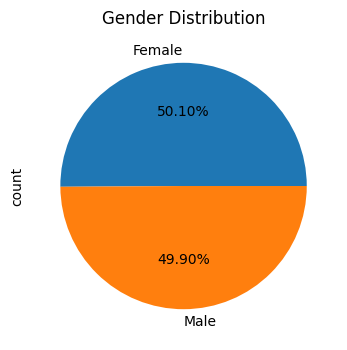

In [9]:
plt.figure(figsize = (4,4))
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Branch Distribution')

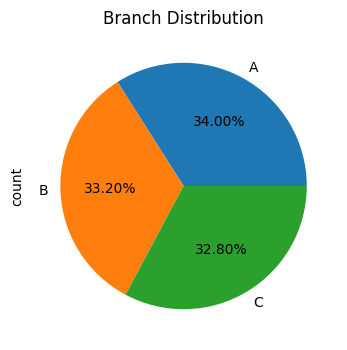

In [10]:
plt.figure(figsize = (4,4))
df['Branch'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Branch Distribution')

Text(0.5, 1.0, 'city Distribution')

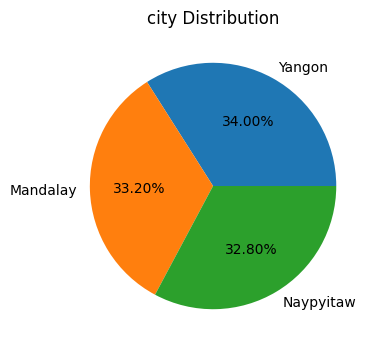

In [11]:
plt.figure(figsize = (4,4))
df['City'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.ylabel('')
plt.title('city Distribution')

Text(0.5, 1.0, 'customer Distribution')

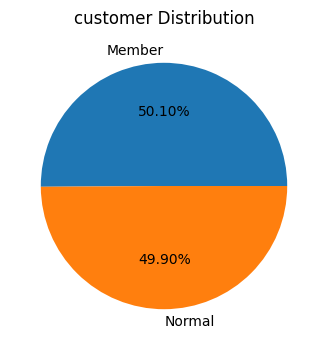

In [12]:
plt.figure(figsize = (4,4))
df['Customer type'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.ylabel('')
plt.title('customer Distribution')

Text(0.5, 1.0, 'Product Line Distribution')

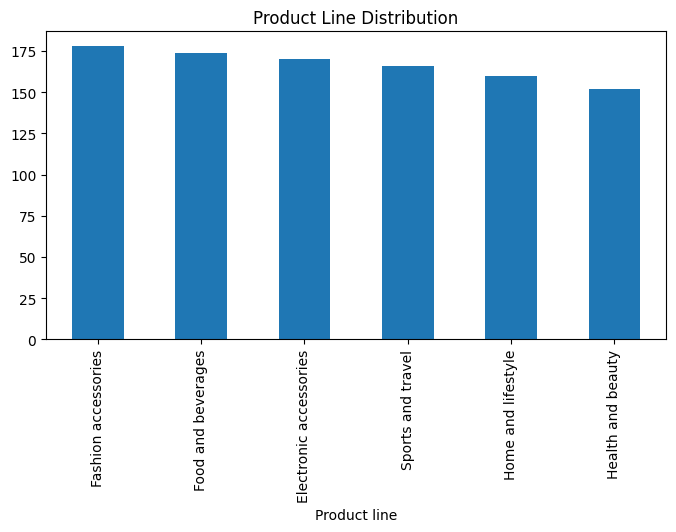

In [13]:
plt.figure(figsize = (8,4))
df['Product line'].value_counts().plot(kind = 'bar')
plt.title('Product Line Distribution')

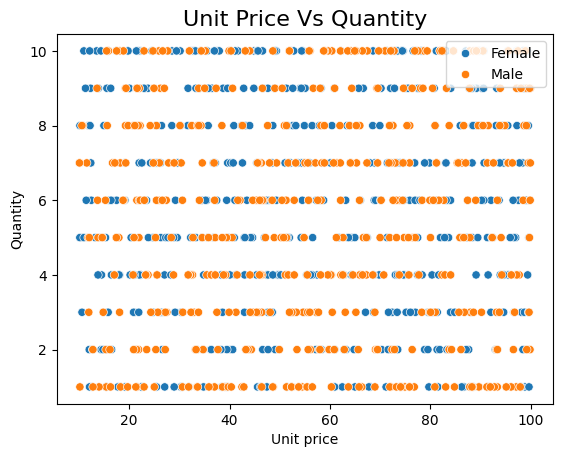

In [14]:
sns.scatterplot(data = df , x ='Unit price' , y = 'Quantity' , hue = 'Gender' )
plt.title('Unit Price Vs Quantity',fontsize = 16)
plt.legend(loc = 'upper right')

<ipython-input-15-e2a8c6833759>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product line', y='Tax 5%', palette='Set2')


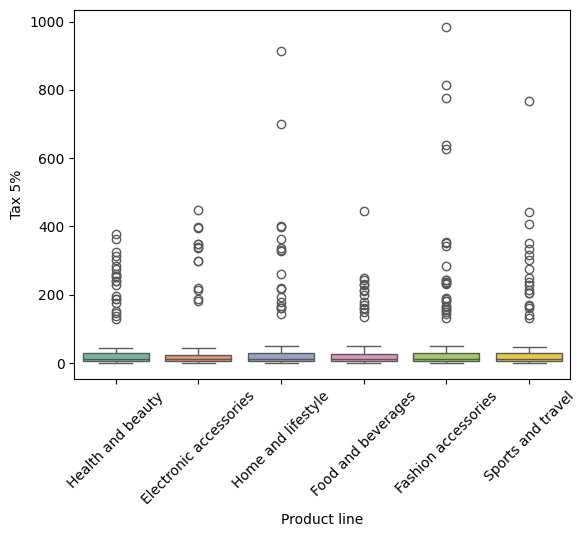

In [15]:
sns.boxplot(data=df, x='Product line', y='Tax 5%', palette='Set2')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Gender'>

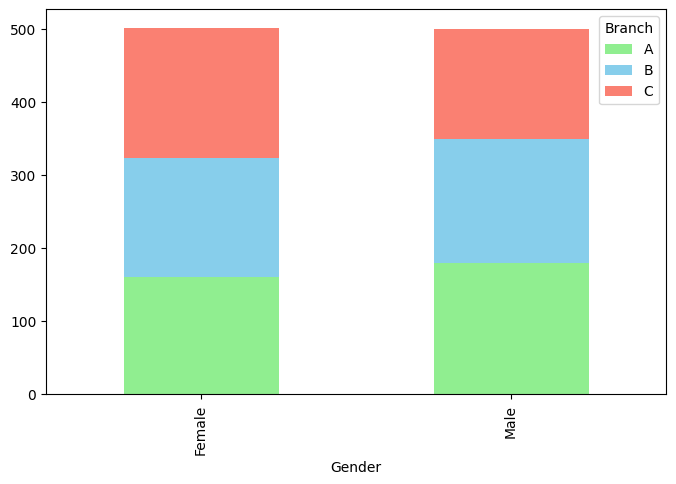

In [16]:
gender_branch = df.groupby(['Gender' , 'Branch']).size().unstack()
gender_branch.plot(kind = 'bar', stacked = True , figsize = (8,5), color = ['lightGreen','skyBlue','salmon'])

<Axes: xlabel='City'>

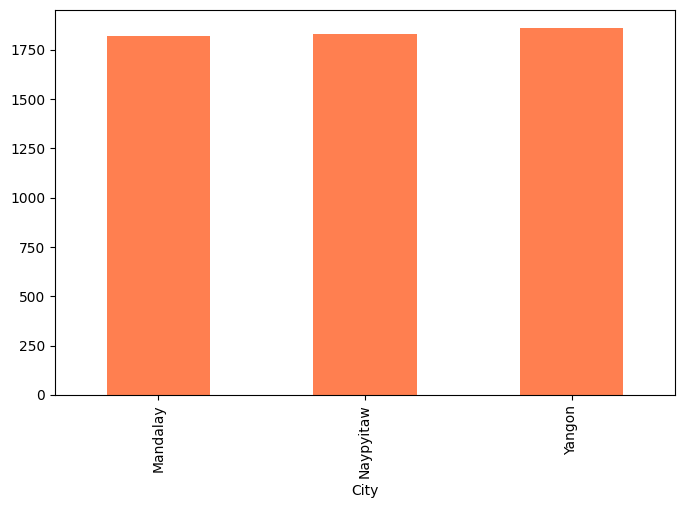

In [17]:
city_quantity = df.groupby('City')['Quantity'].sum().sort_values()
city_quantity.plot(kind='bar', color='coral', figsize=(8, 5))

<Axes: xlabel='Product line', ylabel='Customer type'>

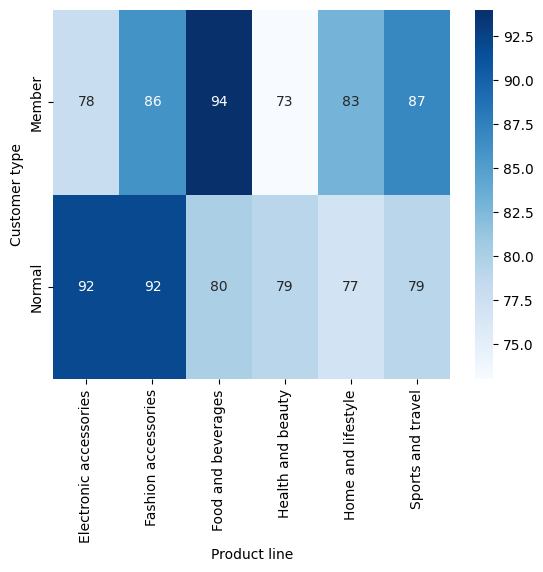

In [18]:
customer_product = pd.crosstab(df['Customer type'], df['Product line'])
sns.heatmap(customer_product, annot=True, fmt="d", cmap="Blues")

<ipython-input-19-f9b8f2ceea07>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Tax 5%', palette='muted')


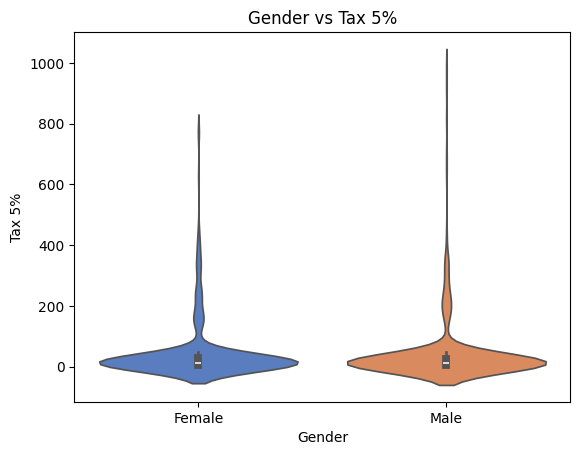

In [19]:
sns.violinplot(data=df, x='Gender', y='Tax 5%', palette='muted')
plt.title('Gender vs Tax 5%')
plt.xlabel('Gender')
plt.ylabel('Tax 5%')
plt.show()

In [20]:
pivot = df.pivot_table(values='Tax 5%', index='Customer type', columns='Product line', aggfunc='mean')
print(pivot)

Product line   Electronic accessories  Fashion accessories  \
Customer type                                                
Member                      31.597635            56.545308   
Normal                      40.641505            59.490005   

Product line   Food and beverages  Health and beauty  Home and lifestyle  \
Customer type                                                              
Member                  33.637351          63.443979           51.507151   
Normal                  27.315487          28.616601           43.845753   

Product line   Sports and travel  
Customer type                     
Member                 39.186293  
Normal                 51.545373  


In [21]:
new_df = df.drop('Invoice ID', axis = 1)
new_df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...
995,Male,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [22]:
cat_features = ['Gender','Branch','City','Customer type','Product line'	]
encode = LabelEncoder()
for col in cat_features:
    new_df[col] = encode.fit_transform(new_df[col])

In [23]:
new_df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,0,0,2,0,3,74.69,7,261.4150
1,0,2,1,1,0,15.28,5,3.8200
2,0,0,2,0,0,68.84,6,20.6520
3,0,2,1,1,4,73.56,10,36.7800
4,0,0,2,0,3,36.26,2,3.6260
...,...,...,...,...,...,...,...,...
995,1,0,2,1,0,58.03,2,5.8030
996,1,1,0,1,1,17.49,10,8.7450
997,1,2,1,1,3,40.35,1,2.0175
998,1,0,2,0,2,31.84,1,1.5920


In [24]:
x = new_df.drop('Unit price', axis = 1)
y = new_df['Unit price']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state = 26)

In [25]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
x_train_scaled

array([[-1.01765584, -1.20003697,  1.19153003, ..., -0.26681858,
        -0.15596048, -0.39720548],
       [-1.01765584,  0.00603034, -1.27476758, ..., -0.85323303,
         0.52770189, -0.29732683],
       [ 0.98265048,  0.00603034, -1.27476758, ..., -1.43964748,
         1.55319544, -0.08227214],
       ...,
       [ 0.98265048,  1.21209764, -0.04161877, ...,  0.90601033,
         0.52770189, -0.37514586],
       [-1.01765584, -1.20003697,  1.19153003, ..., -0.85323303,
        -0.83962284,  0.84932795],
       [ 0.98265048, -1.20003697,  1.19153003, ...,  0.90601033,
        -0.83962284, -0.35421489]])

# Model 1 : Linear Regeession

In [27]:
le = LinearRegression()
le.fit(x_train_scaled , y_train)

LinearRegression()

In [28]:
y_pred = le.predict(x_test_scaled)
y_pred

array([56.11581702, 55.52543494, 55.74943611, 55.24792427, 55.19128182,
       54.29202577, 53.56782095, 55.69406763, 59.5642381 , 60.92959783,
       54.57186322, 56.18206335, 53.81105034, 54.828011  , 56.14412313,
       55.24870127, 80.27627053, 54.16059683, 55.03545598, 55.39566565,
       54.85927482, 54.99151045, 54.47118024, 59.82344328, 55.46988615,
       55.13056327, 54.46439801, 67.39640899, 55.13950659, 55.11870486,
       54.41835895, 61.34023849, 55.74293607, 55.58219292, 53.88440263,
       64.83862656, 65.82303667, 55.12373264, 53.42900428, 55.24385659,
       55.12048243, 54.36594401, 54.66292476, 56.25581946, 54.85599182,
       54.79633219, 55.38182914, 54.86737939, 54.0711612 , 55.57831668,
       54.72606303, 55.27382786, 53.62785661, 55.95618284, 54.43958372,
       55.5824719 , 55.85865983, 55.42729899, 54.66127123, 55.78790284,
       54.75091198, 55.88337436, 55.26236234, 55.16793174, 55.43300767,
       55.29361727, 54.38901817, 54.66321379, 53.66194071, 54.89

In [29]:
r2_score(y_test , y_pred)

0.02316186476259985

# Model 2 : Random Forest Regressor

In [30]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled , y_train)

RandomForestRegressor()

In [31]:
rf_pred = rf.predict(x_test_scaled)

In [32]:
r2_score(y_test , rf_pred)

0.9946238328080681